# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайн: 3 марта 23:59</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [3]:
import numpy as np
import pandas as pd

In [98]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

# Ваш код здесь
A = np.random.randint(0, 100, (10,10))
print(A)

[[83 77 16 95 78 95 48  8 26 72]
 [43 25  1 71 75 50 70 11 23 21]
 [99 89 38 84 91 39 19  3 10 34]
 [61 33 91 12 80 76 22 63 35  7]
 [35  8  7 36 17 50 28 29 88 26]
 [66 98 48 31 32 48 90 28 31 24]
 [45 49 94 54 45 68 67 30 17 33]
 [93 29 73  6 66 94 49 49 75 33]
 [ 5 90 42 76 52 54 18  0 47 82]
 [55 45 47  1  8 81 66 90 54 20]]


In [99]:
# Посчитайте средние значения в матрице по столбцам

# Ваш код здесь
np.average(A, axis=0)

array([58.5, 54.3, 45.7, 46.6, 54.4, 65.5, 47.7, 31.1, 40.6, 35.2])

In [100]:
# Транспонируйте матрицу A

# Ваш код здесь
A.T

array([[83, 43, 99, 61, 35, 66, 45, 93,  5, 55],
       [77, 25, 89, 33,  8, 98, 49, 29, 90, 45],
       [16,  1, 38, 91,  7, 48, 94, 73, 42, 47],
       [95, 71, 84, 12, 36, 31, 54,  6, 76,  1],
       [78, 75, 91, 80, 17, 32, 45, 66, 52,  8],
       [95, 50, 39, 76, 50, 48, 68, 94, 54, 81],
       [48, 70, 19, 22, 28, 90, 67, 49, 18, 66],
       [ 8, 11,  3, 63, 29, 28, 30, 49,  0, 90],
       [26, 23, 10, 35, 88, 31, 17, 75, 47, 54],
       [72, 21, 34,  7, 26, 24, 33, 33, 82, 20]])

In [101]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

# Ваш код здесь
A * A.T

array([[6889, 3311, 1584, 5795, 2730, 6270, 2160,  744,  130, 3960],
       [3311,  625,   89, 2343,  600, 4900, 3430,  319, 2070,  945],
       [1584,   89, 1444, 7644,  637, 1872, 1786,  219,  420, 1598],
       [5795, 2343, 7644,  144, 2880, 2356, 1188,  378, 2660,    7],
       [2730,  600,  637, 2880,  289, 1600, 1260, 1914, 4576,  208],
       [6270, 4900, 1872, 2356, 1600, 2304, 6120, 2632, 1674, 1944],
       [2160, 3430, 1786, 1188, 1260, 6120, 4489, 1470,  306, 2178],
       [ 744,  319,  219,  378, 1914, 2632, 1470, 2401,    0, 2970],
       [ 130, 2070,  420, 2660, 4576, 1674,  306,    0, 2209, 4428],
       [3960,  945, 1598,    7,  208, 1944, 2178, 2970, 4428,  400]])

In [102]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

# Ваш код здесь
B = A@A
print(B)

[[33573 30973 25336 26277 30287 39291 31330 20778 23749 18530]
 [20442 18632 19473 16661 19115 25657 19024 13199 16568 12281]
 [29743 24000 17293 26247 29215 33011 23454 14685 20012 16405]
 [31448 28475 18233 25395 27290 29429 21964 10705 20193 17982]
 [15860 21045 16296 15475 16694 21472 14738  9151 13661 14437]
 [28752 26879 21261 27680 29128 31672 26382 12207 16222 17559]
 [32210 29030 23587 25149 29143 30976 24387 14242 17165 15900]
 [34025 36378 22695 31061 30285 36061 27533 13047 22562 23845]
 [24018 23391 19158 19477 23564 27985 22790 16884 18473 12946]
 [29550 29182 22728 23407 26628 31156 25343 11829 17675 18638]]


### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [4]:
all_data = pd.read_csv('/home/jeny/ml_mipt_2019/ml-mipt/Homeworks/HW_1_Linclass_kNN/forest_dataset.csv')
all_data.shape

(10000, 55)

Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [5]:
# Ваш код здесь
delayed_data = all_data.iloc[6000:8000, :]
all_data.drop(all_data.index[6000:8000], inplace=True)
all_data.shape


(8000, 55)

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [6]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values
feature_matrix

array([[2683,  333,   35, ...,    0,    0,    0],
       [2915,   90,    8, ...,    0,    0,    0],
       [2941,  162,    7, ...,    0,    0,    0],
       ...,
       [2693,   21,   11, ...,    0,    0,    0],
       [2536,   42,   11, ...,    0,    0,    0],
       [3109,  261,   10, ...,    0,    0,    0]])

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [8]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]


In [9]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix,
                                                                                        two_class_labels)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [10]:
lr_clf = LogisticRegression()

In [11]:
# Ваш код здесь
lr_clf.fit(train_feature_matrix, train_labels)
y_pred = lr_clf.predict(test_feature_matrix)

print (accuracy_score(test_labels,y_pred), 
       f1_score(test_labels,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.777196044211751 0.7312280701754386


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [13]:
lr_clf = LogisticRegression(solver = 'saga', multi_class = 'multinomial' )

# Ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, 
                                                    labels,
                                                    test_size = 0.2,
                                                    random_state = 42)
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [14]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l1', 'l2'), 'C':np.linspace(0.01,1,10)}
grid_clf = GridSearchCV(lr_clf, 
                         cv = 5, 
                         param_grid = parameters,
                         scoring = 'accuracy')
grid_clf.fit(X_train, y_train)
print ( accuracy_score(y_test, grid_clf.predict(X_test)), 
        accuracy_score(y_test, lr_clf.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

0.65125 0.6325


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Постройте графики средних значений критерия качества `accuracy` для типов регуляризации 
`l1` и `l2` в зависимости от коэффициента регуляризации `C`.

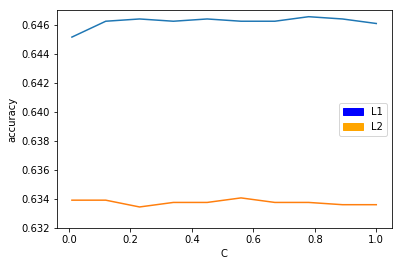

In [124]:
# Ваш код здесь
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



x = np.linspace(0.01,1,10)

y_l1 = list()
y_l2 = list()

for i in range(0, 20):
    if i%2 == 0:
        y_l1.append( grid_clf.cv_results_['mean_test_score'][i] )
    else:
        y_l2.append( grid_clf.cv_results_['mean_test_score'][i] )


l1_plot = plt.plot(x, y_l1, label = 'L1')
l2_plot = plt.plot(x, y_l2, label = 'L2')
plt.xlabel('C')
plt.ylabel('accuracy')

axes = plt.gca()
axes.set_ylim([0.632,0.647])

blue_patch = mpatches.Patch(color='blue', label='L1')
orange_patch = mpatches.Patch(color='orange', label='L2')
plt.legend( handles=[blue_patch, orange_patch] )

plt.show()


Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [107]:
# Ваш код здесь
print ("BEST PARAMS:")
print (grid_clf.best_params_)

BEST PARAMS:
{'C': 0.78, 'penalty': 'l1'}


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [132]:
best_lr_clf = LogisticRegression(solver = 'saga', C = 0.78, penalty = 'l1')
best_lr_clf.fit(X_train, y_train)

pred = best_lr_clf.predict_proba(X_test)

# Ваш код здесь

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [204]:
# Ваш код здесь
from collections import Counter
pred_mean = np.mean(pred, axis = 0)
size = y_train.shape
amount = Counter(y_train)

pred_frequency = list()

for i in range(1, 8): 
    pred_frequency.append( amount[i]/size[0] )
      
print (pred_frequency)
print ()
print (pred_mean) 

[0.365625, 0.49453125, 0.05625, 0.00484375, 0.01546875, 0.03015625, 0.033125]

[0.36168153 0.50820564 0.04960296 0.00401387 0.01589967 0.02688988
 0.03370646]



#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [229]:
from sklearn.neighbors import KNeighborsClassifier

# Ваш код здесь
knn_cl = KNeighborsClassifier(weights='distance') # Ближний сосед при distance имеет болльший вес чем дальний
knn_cl.fit(X_train, y_train)                      #  Uniform - все веса одинаковые
accuracy_score(y_test, knn_cl.predict(X_test))

0.764375

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [225]:
# Ваш код здесь
parameters = {'n_neighbors':np.arange(1,41,1)}
knn_grid = GridSearchCV(knn_cl, 
             cv = 5,
             param_grid = parameters,
             scoring = 'accuracy'
             )

knn_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

{'n_neighbors': 8}


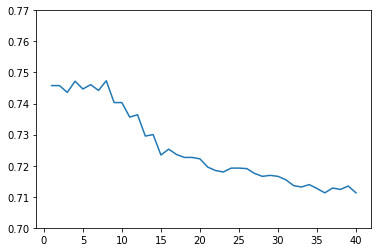

In [226]:
print(knn_grid.best_params_)


from matplotlib import pyplot as plt
%matplotlib inline
y = knn_grid.cv_results_['mean_test_score']
x = knn_grid.cv_results_['param_n_neighbors']

axes = plt.gca()
axes.set_ylim([0.7,0.77])
plt.plot(x, y)
plt.show()

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [227]:
# Ваш код здесь
knn_grid.predict_proba(X_test)

array([[0.55282088, 0.44717912, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.71246714, 0.28753286, ..., 0.        , 0.        ,
        0.        ],
       [0.79121486, 0.20878514, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.10462004, 0.89537996, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17415141, 0.82584859, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.93264631, 0.06735369, 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [230]:
# Ваш код здесь

y_delayed = delayed_data[delayed_data.columns[-1]].values
X_delayed = delayed_data[delayed_data.columns[:-1]].values

knn_pred = knn_cl.predict(X_delayed)
lr_pred = best_lr_clf.predict(X_delayed)



In [231]:
print ( accuracy_score(y_delayed, knn_pred), 
        accuracy_score(y_delayed, lr_pred))

0.7405 0.606


KNN ЛУЧШЕ